# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari Kaggle
   Give Me Some Credit: https://www.kaggle.com/c/GiveMeSomeCredit


# **2. Import Library**

In [2]:
import pandas as pd
import numpy as np

# **3. Memuat Dataset**

In [3]:
train = pd.read_csv('/content/credit_train.csv')
test = pd.read_csv('/content/credit_test.csv')
train, test

(        RevolvingUtilizationOfUnsecuredLines  age  \
 0                                   0.031310   73   
 1                                   1.029940   30   
 2                                   0.315446   31   
 3                                   0.758933   57   
 4                                   0.031065   54   
 ...                                      ...  ...   
 119380                              0.263669   43   
 119381                              0.740365   56   
 119382                              0.100578   69   
 119383                              0.342056   38   
 119384                              0.140572   48   
 
         NumberOfTime30-59DaysPastDueNotWorse    DebtRatio  MonthlyIncome  \
 0                                          0     0.991871         5166.0   
 1                                          0     0.215870         3200.0   
 2                                          0     0.236480         4511.0   
 3                                        

# **4. Exploratory Data Analysis (EDA)**


Informasi dataset train:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119385 entries, 0 to 119384
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   RevolvingUtilizationOfUnsecuredLines  119385 non-null  float64
 1   age                                   119385 non-null  int64  
 2   NumberOfTime30-59DaysPastDueNotWorse  119385 non-null  int64  
 3   DebtRatio                             119385 non-null  float64
 4   MonthlyIncome                         119385 non-null  float64
 5   NumberOfOpenCreditLinesAndLoans       119385 non-null  int64  
 6   NumberOfTimes90DaysLate               119385 non-null  int64  
 7   NumberRealEstateLoansOrLines          119385 non-null  int64  
 8   NumberOfTime60-89DaysPastDueNotWorse  119385 non-null  int64  
 9   NumberOfDependents                    119385 non-null  float64
 10  SeriousDlqin2yrs                      11938

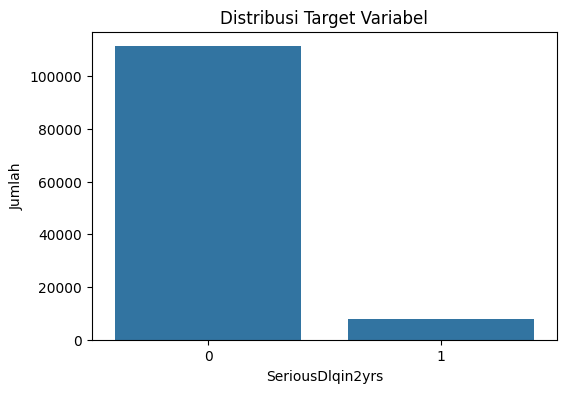

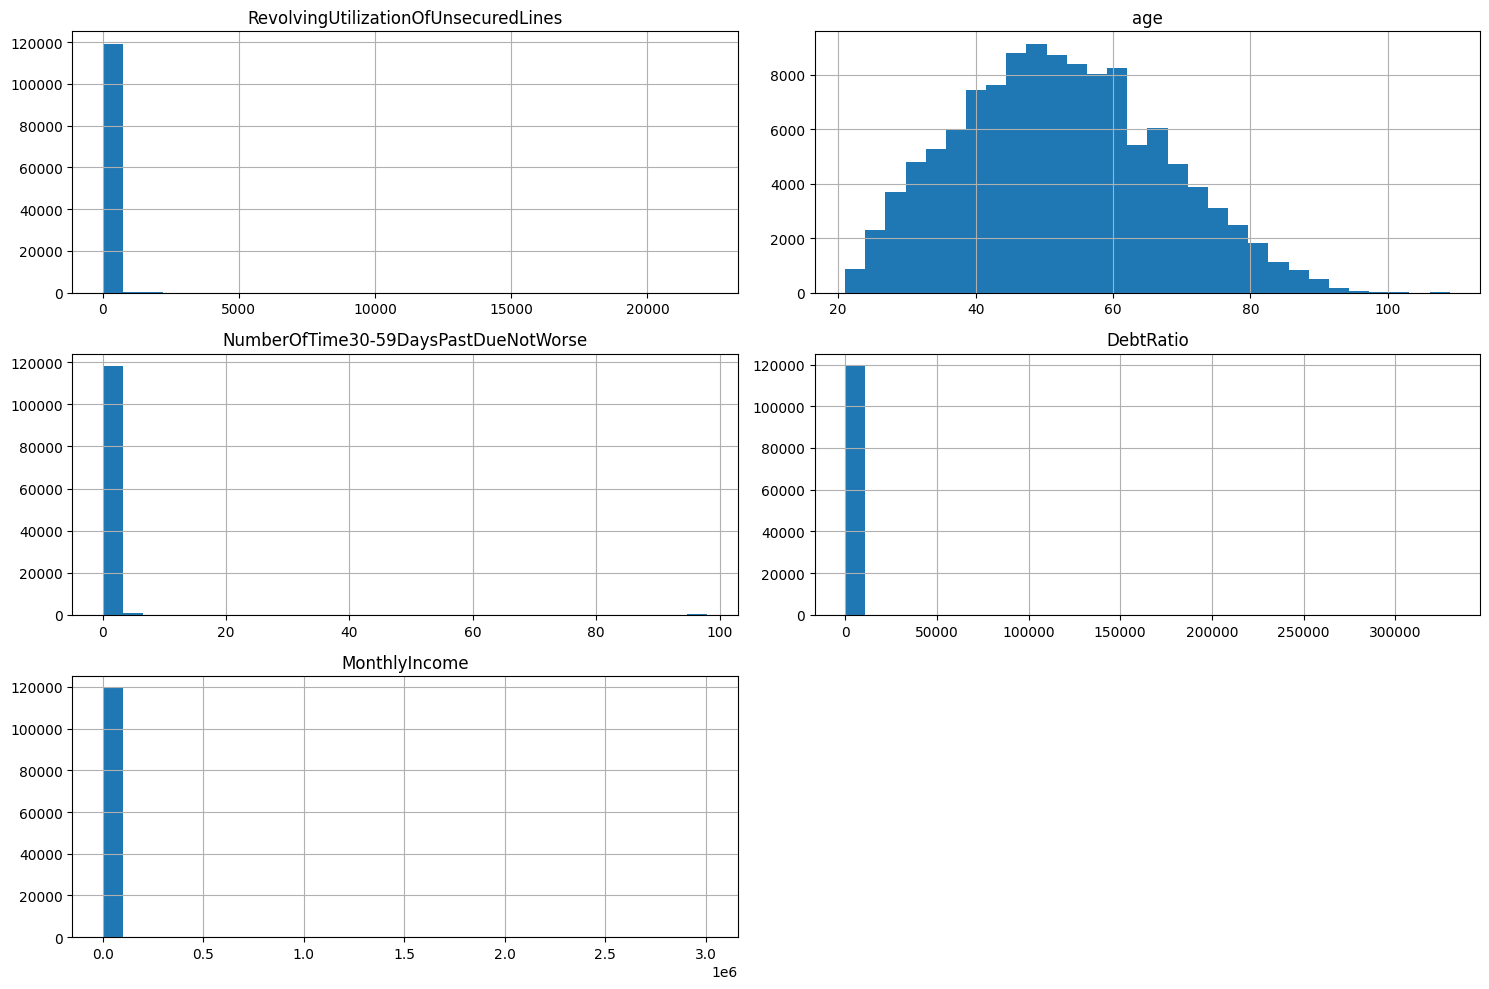

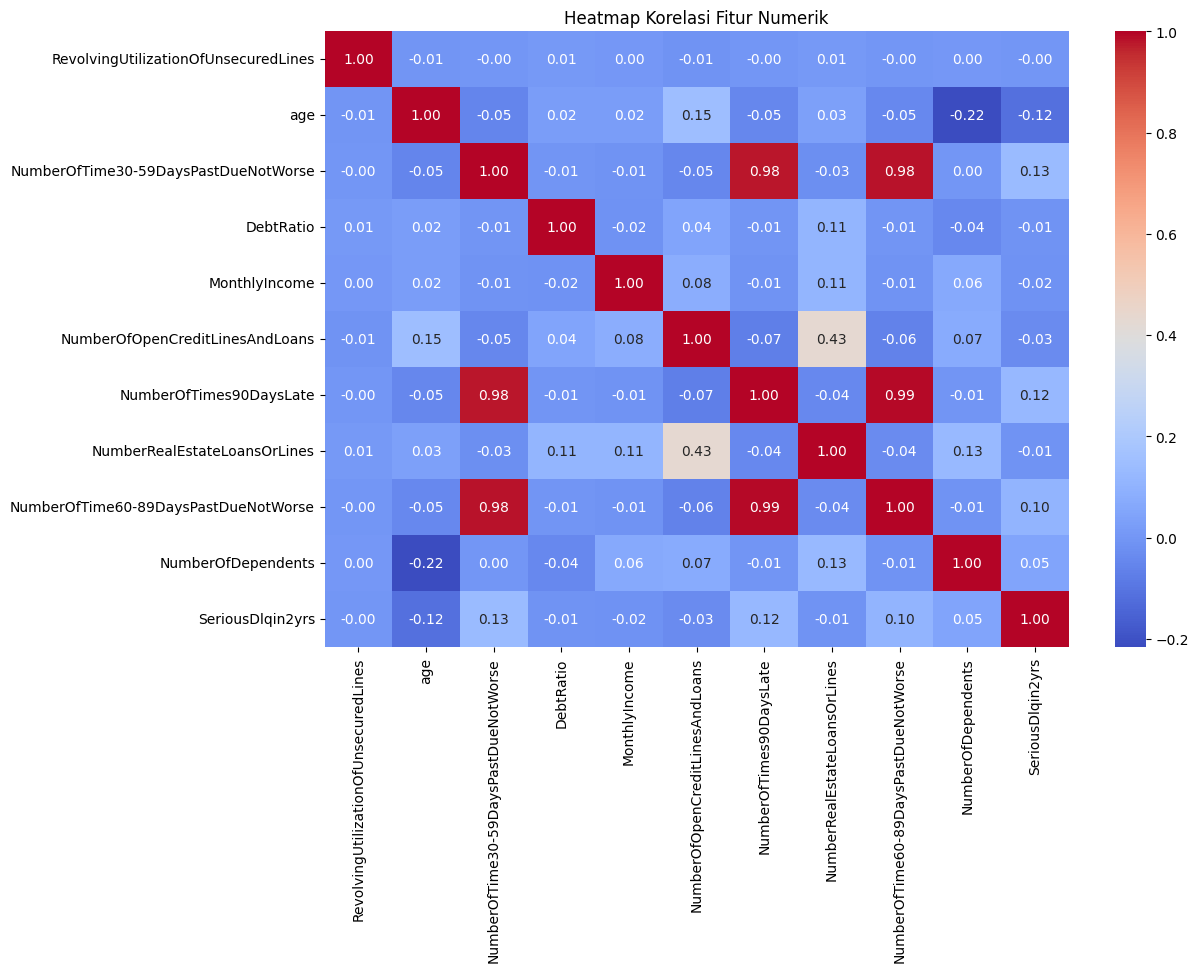

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Menampilkan informasi dasar dataset
print("Informasi dataset train:")
train.info()
print("\nInformasi dataset test:")
test.info()

# Menampilkan deskripsi statistik dataset
print("\nDeskripsi statistik dataset train:")
print(train.describe())
print("\nDeskripsi statistik dataset test:")
print(test.describe())

# Mengecek missing values
print("\nJumlah missing values pada dataset train:")
print(train.isnull().sum())
print("\nJumlah missing values pada dataset test:")
print(test.isnull().sum())

# Visualisasi distribusi target variabel (untuk dataset train)
plt.figure(figsize=(6, 4))
sns.countplot(x='SeriousDlqin2yrs', data=train)
plt.title('Distribusi Target Variabel')
plt.xlabel('SeriousDlqin2yrs')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi distribusi beberapa kolom numerik (contoh)
numerical_cols = train.select_dtypes(include=np.number).columns.tolist()
# Hapus kolom target jika ada
if 'SeriousDlqin2yrs' in numerical_cols:
    numerical_cols.remove('SeriousDlqin2yrs')
# Hapus kolom index yang tidak relevan
if 'Unnamed: 0' in numerical_cols:
    numerical_cols.remove('Unnamed: 0')

if len(numerical_cols) > 0:
    # Pilih beberapa kolom untuk visualisasi agar tidak terlalu banyak plot
    cols_to_plot = numerical_cols[:5] # Ambil 5 kolom pertama
    train[cols_to_plot].hist(figsize=(15, 10), bins=30)
    plt.tight_layout()
    plt.show()

# Heatmap korelasi antar fitur numerik (untuk dataset train)
plt.figure(figsize=(12, 8))
correlation_matrix = train[numerical_cols + ['SeriousDlqin2yrs']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()

# **5. Data Preprocessing**

Tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [ ]:
# Menangani missing values
# Untuk kolom 'MonthlyIncome' dan 'NumberOfDependents', kita bisa mengisi missing values dengan median.
# Median lebih robust terhadap outliers dibandingkan mean.
train['MonthlyIncome'] = train['MonthlyIncome'].fillna(train['MonthlyIncome'].median())
test['MonthlyIncome'] = test['MonthlyIncome'].fillna(test['MonthlyIncome'].median())

train['NumberOfDependents'] = train['NumberOfDependents'].fillna(train['NumberOfDependents'].median())
test['NumberOfDependents'] = test['NumberOfDependents'].fillna(test['NumberOfDependents'].median())

# Mengecek kembali missing values setelah penanganan
print("\nJumlah missing values pada dataset train setelah penanganan:")
print(train.isnull().sum())
print("\nJumlah missing values pada dataset test setelah penanganan:")
print(test.isnull().sum())


# Menangani outliers pada kolom 'age' dan 'NumberOfTime30-59DaysPastDueNotWorst' (dan kolom-kolom dengan nilai ekstrem lainnya)
# Untuk 'age', nilai 0 tampaknya merupakan data yang salah. Kita bisa menghapusnya atau menggantinya dengan nilai lain (misal: median).
# Untuk kasus ini, kita akan menghapus baris dengan age = 0 pada data train.
train = train[train['age'] > 0]

# Untuk kolom-kolom seperti 'NumberOfTime30-59DaysPastDueNotWorst', 'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorst',
# ada nilai-nilai yang sangat besar (misal 96, 98). Ini kemungkinan outliers atau nilai khusus yang menandakan sesuatu.
# Untuk tujuan pemodelan awal, kita bisa membatasi nilai-nilai ini pada threshold tertentu atau membiarkannya tergantung pada strategi model.
# Jika kita memutuskan untuk membatasi, kita bisa mengganti nilai-nilai ekstrem dengan threshold atau median/mean dari nilai yang wajar.
# Untuk saat ini, kita akan membiarkan nilai-nilai ekstrem tersebut, namun perlu diingat untuk eksplorasi lebih lanjut.

# Kolom 'DebtRatio' juga bisa memiliki nilai ekstrem. Tidak ada penanganan khusus untuk saat ini.
# Kolom 'RevolvingUtilizationOfUnsecuredLines' juga bisa memiliki nilai > 1, ini normal dalam konteks rasio kredit.

# Tidak ada data kategorikal yang perlu di-encode pada dataset ini.
# Binning tidak diperlukan untuk model klasifikasi standar pada dataset ini.

# Menghapus data duplikat
train = train.drop_duplicates()
test = test.drop_duplicates()

print(f"\nUkuran dataset train setelah menghapus duplikat: {train.shape}")
print(f"Ukuran dataset test setelah menghapus duplikat: {test.shape}")

# Tidak ada normalisasi/standarisasi eksplisit dilakukan di sini,
# namun mungkin diperlukan tergantung pada model machine learning yang digunakan.
# Beberapa model sensitif terhadap skala fitur (misal: SVM, K-NN),
# sementara model lain (misal: Tree-based models) tidak terlalu sensitif.

print("\nSampel data train setelah preprocessing:")
print(train.head())
print("\nSampel data test setelah preprocessing:")
print(test.head())


Jumlah missing values pada dataset train setelah penanganan:
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
SeriousDlqin2yrs                        0
dtype: int64

Jumlah missing values pada dataset test setelah penanganan:
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents      

In [ ]:
# Unduh dataset bersih train
train.to_csv('cleaned_training.csv', index=False)

# Unduh dataset bersih test
test.to_csv('cleaned_testing.csv', index=False)
print("\nDataset bersih 'cleaned_training.csv' dan 'cleaned_testing.csv' telah berhasil diunduh.")


Dataset bersih 'cleaned_training.csv' dan 'cleaned_testing.csv' telah berhasil diunduh.
